In [ ]:
import logging
import numpy as np
import pandas as pd

from src.datasets import load_iris
from src.model_selection import grid_search, score_zoom
from src.shadow_learn import ShadowedSetEstimator
from src.utils import create_logfile, log_last_execution, plot_shadowed_set

In [2]:
log = False
create_logfile('grid_search_two_phases_dual_iris', 
               'Started Grid Search for Gurobi Two Phases Dual Models on Iris dataset', log)

In [3]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
label_colors = ['cornflowerblue', 'mediumseagreen', 'crimson']

contourf_colors = ['white', 'pink', 'palevioletred', 'red']

In [4]:
estimator = ShadowedSetEstimator(solver='gurobi-two-phases-dual')

## Iris-virginica conservative metric GridSearch

In [5]:
dataset_loader = lambda: load_iris(d=2, target='Iris-virginica')

In [6]:
C0_range = np.concatenate((np.logspace(-1, 1, 5), [20]))
C1_range = np.concatenate((np.logspace(-1, 1, 5), [0.288889]))
sigma_range = np.concatenate((np.logspace(-1, 2, 5), [1.36, 30]))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [7]:
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid, log=log)

***** Split n. 0
Fitting 10 folds for each of 252 candidates, totalling 2520 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  66 tasks      | elapsed:    5.6s
[Parallel(n_jobs=2)]: Done 366 tasks      | elapsed:   18.6s
[Parallel(n_jobs=2)]: Done 866 tasks      | elapsed:   38.8s
[Parallel(n_jobs=2)]: Done 1566 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 2466 tasks      | elapsed:  1.7min


Using license file C:\Users\gabri\gurobi.lic
Academic license - for non-commercial use only - expires 2021-01-08
Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0x3c2a7d9b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 1e+00]
  Bounds range     [1e-01, 1e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 1 rows, 68 columns, 68 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.3690801e-02   9.000000e-01   0.000000e+00      0s
       1   -3.6443333e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective -3.644333348e-02


[Parallel(n_jobs=2)]: Done 2517 out of 2520 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=2)]: Done 2520 out of 2520 | elapsed:  1.8min finished
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean_fit_time                                                     0.0678383
std_fit_time                                                     0.00195093
mean_score_time                                                  0.00361087
std_score_time                                                  0.000429638
param_estimator__C0                                                     0.1
param_estimator__C1                                                0.316228
param_estimator__sigma                                                 1.36
params                    {'estimator__C0': 0.1, 'estimator__C1': 0.3162...
split0_test_score                                                         1
split1_test_score                                                         1
split2_test_score                                                  0.818182
split3_test_score                                                         1
split4_test_score                                                  0.909091
split5_test_

100%|##########| 104632/104632 [00:37<00:00, 2764.55it/s]
F:\Copia HD G\Universita\UNIMI\Th\PyCharm\shadowedSetLearn\src\utils.py:91: UserWarning: No contour levels were found within the data range.
  out2 = ax.contour(xx, yy, Z, levels=contour_levels, linewidths=1, linestyles='dashed', colors=line_colors)


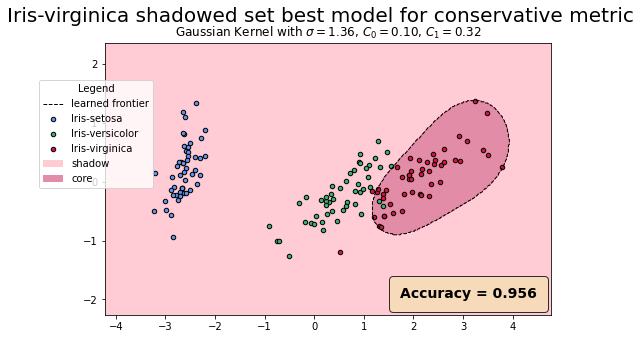

In [8]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Iris-virginica conservative metric score charts with fixed C0

In [9]:
logging.info('*** Iris-virginica conservative metric score charts with fixed C0 ***')

In [10]:
C1_range = np.linspace(0.2, 0.6, 10)
sigma_range = np.linspace(0.5, 3, 10)
param_grid = {'C1': C1_range, 'sigma': sigma_range}

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.0s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.0s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0x30f645c0
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 1e+00]
  Bounds range     [1e-01, 1e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 1 rows, 68 columns, 68 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.5284507e-02   9.000000e-01   0.000000e+00      0s
       1   -3.5166695e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective -3.516669491e-02


[Parallel(n_jobs=2)]: Done 1207 out of 1210 | elapsed:   46.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   46.2s finished
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean_fit_time                                                     0.0671834
std_fit_time                                                     0.00208445
mean_score_time                                                  0.00351391
std_score_time                                                  0.000478409
param_estimator__C1                                                0.288889
param_estimator__sigma                                                 1.36
params                    {'estimator__C1': 0.28888888888888886, 'estima...
split0_test_score                                                         1
split1_test_score                                                         1
split2_test_score                                                  0.818182
split3_test_score                                                         1
split4_test_score                                                  0.909091
split5_test_score                                                         1
split6_test_

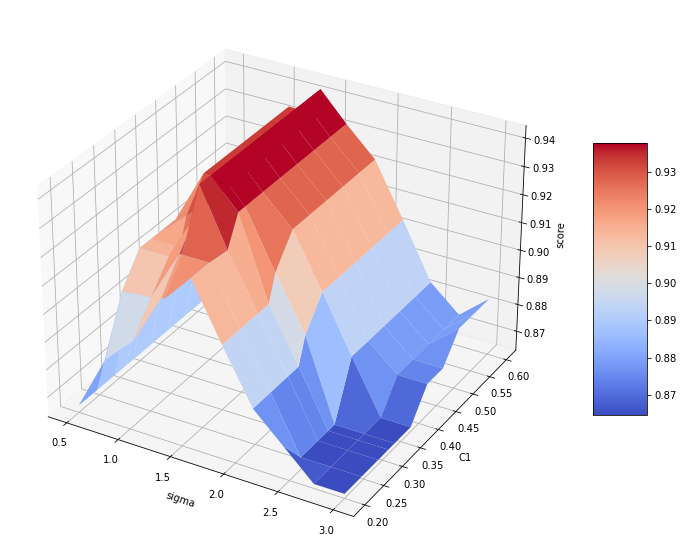

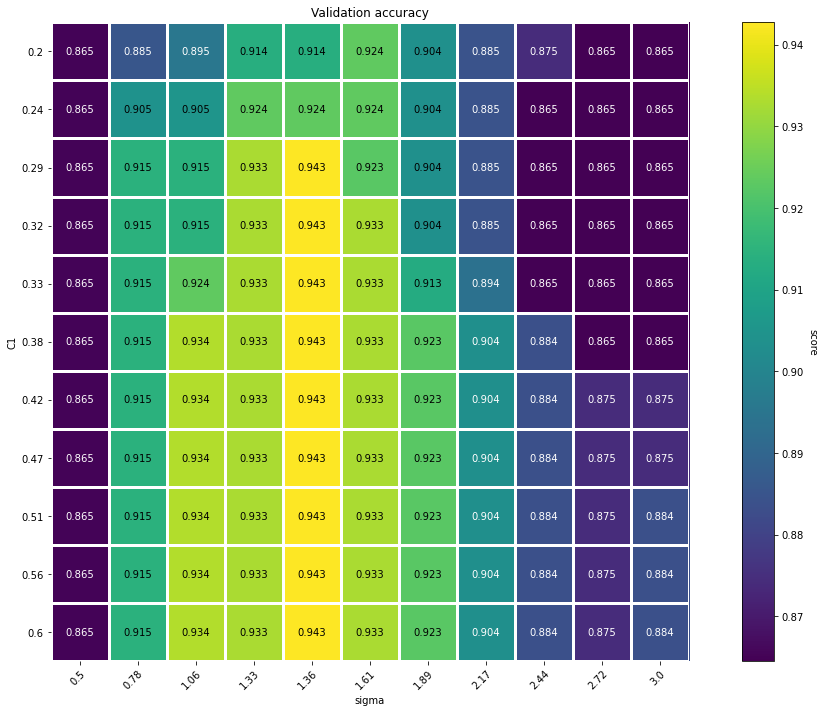

In [11]:
new_gs = score_zoom(gs_res, fixed=['C0'], param_grid=param_grid)

## Iris-virginica conservative metric score charts with fixed C1

In [12]:
C0_range = np.linspace(0.05, 0.5, 10)
sigma_range = np.linspace(0.5, 2.5, 10)
param_grid = {'C0': C0_range, 'sigma': sigma_range}

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   14.9s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.0s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0xdc557975
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 1e+00]
  Bounds range     [5e-02, 5e-02]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 1 rows, 68 columns, 68 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.3690801e-02   9.500000e-01   0.000000e+00      0s
       1   -1.1992724e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective -1.199272405e-01


[Parallel(n_jobs=2)]: Done 1207 out of 1210 | elapsed:   46.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   46.2s finished
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean_fit_time                                                     0.0684787
std_fit_time                                                     0.00209085
mean_score_time                                                  0.00352879
std_score_time                                                  0.000652443
param_estimator__C0                                                    0.05
param_estimator__sigma                                                 1.36
params                    {'estimator__C0': 0.05, 'estimator__sigma': 1.36}
split0_test_score                                                         1
split1_test_score                                                         1
split2_test_score                                                  0.818182
split3_test_score                                                         1
split4_test_score                                                  0.909091
split5_test_score                                                         1
split6_test_

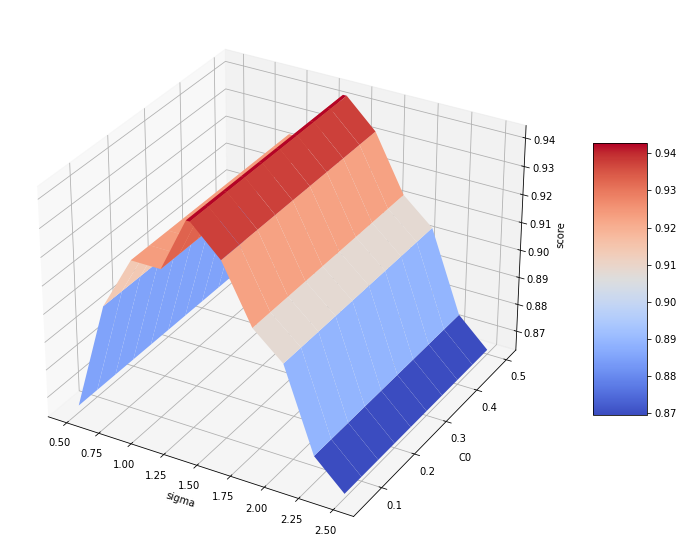

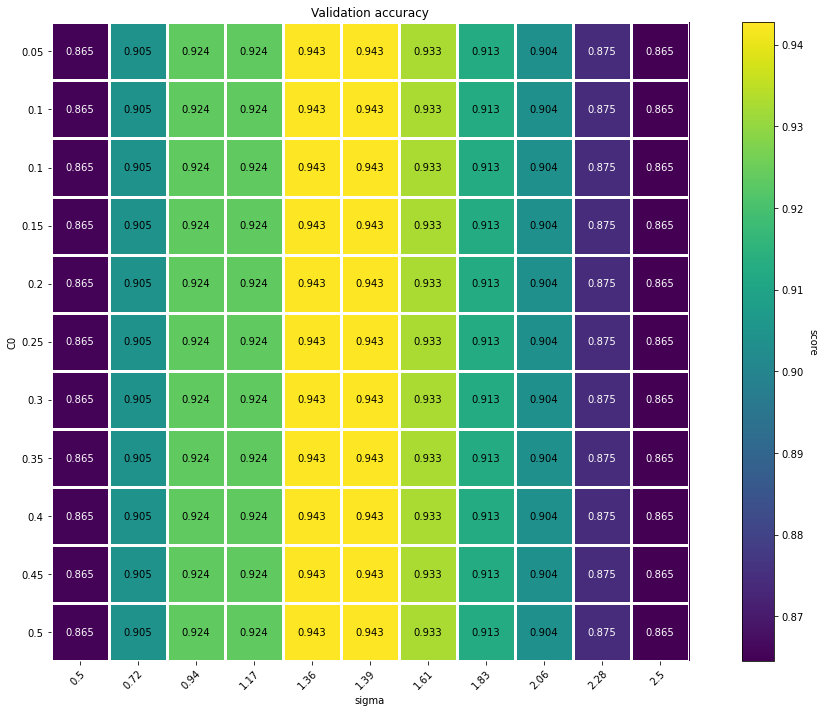

In [13]:
new_gs = score_zoom(gs_res, fixed=['C1'], param_grid=param_grid, log=log)

## Iris-virginica non-conservative metric GridSearch

In [14]:
C0_range = np.concatenate((np.logspace(-1, 0, 5), []))
C1_range = np.concatenate((np.logspace(-1, 0, 5), [0.3]))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [1.38889, 1.4]))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [15]:
gs_res = grid_search(dataset_loader, estimator, 'non-conservative', param_grid, log=log)

***** Split n. 0
Fitting 10 folds for each of 210 candidates, totalling 2100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.2s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   35.0s
[Parallel(n_jobs=2)]: Done 1588 tasks      | elapsed:  1.0min


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0x7ae81d0c
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-01, 1e+00]
  Bounds range     [2e-01, 2e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 35 columns
Presolve time: 0.00s
Presolved: 1 rows, 35 columns, 35 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -6.9211166e-01   8.221721e-01   0.000000e+00      0s
       1   -7.8326368e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective -7.832636826e-01
mean_fit_time                                                     0.0720455
std_fit_time                                                     0.00210867
mean_score_time                                                  0.00351613
std_score_time        

[Parallel(n_jobs=2)]: Done 2100 out of 2100 | elapsed:  1.4min finished


100%|##########| 104632/104632 [00:37<00:00, 2807.03it/s]


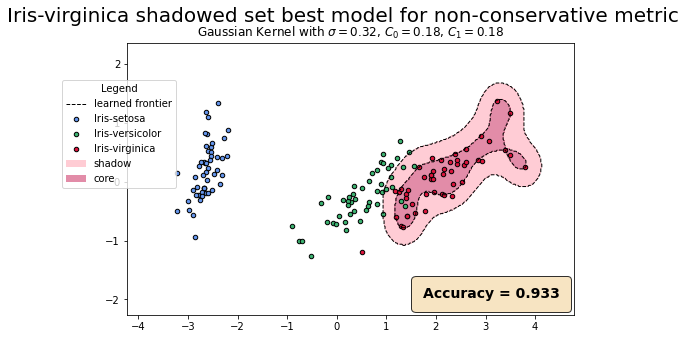

In [16]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Iris-virginica non-conservative metric score charts with fixed C1

In [17]:
C0_range = np.linspace(0.5, 2, 10)
sigma_range = np.linspace(0.5, 2.5, 10)
param_grid = {'C0': C0_range, 'sigma': sigma_range}

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.0s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.3s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0x7ae81d0c
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-01, 1e+00]
  Bounds range     [2e-01, 2e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 35 columns
Presolve time: 0.00s
Presolved: 1 rows, 35 columns, 35 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -6.9211166e-01   8.221721e-01   0.000000e+00      0s
       1   -7.8326368e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective -7.832636826e-01


[Parallel(n_jobs=2)]: Done 1207 out of 1210 | elapsed:   46.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   46.7s finished


mean_fit_time                                                      0.071786
std_fit_time                                                     0.00198286
mean_score_time                                                  0.00361128
std_score_time                                                  0.000447247
param_estimator__C0                                                0.177828
param_estimator__sigma                                             0.316228
params                    {'estimator__C0': 0.1778279410038923, 'estimat...
split0_test_score                                                  0.818182
split1_test_score                                                         1
split2_test_score                                                         1
split3_test_score                                                         1
split4_test_score                                                         1
split5_test_score                                                         1
split6_test_

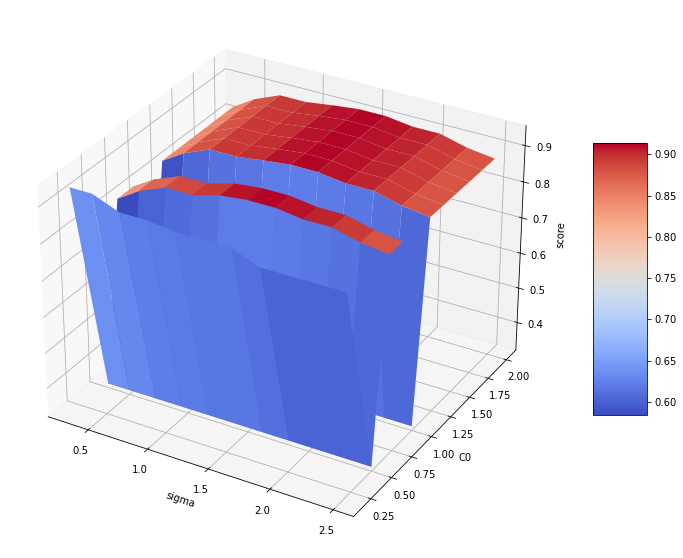

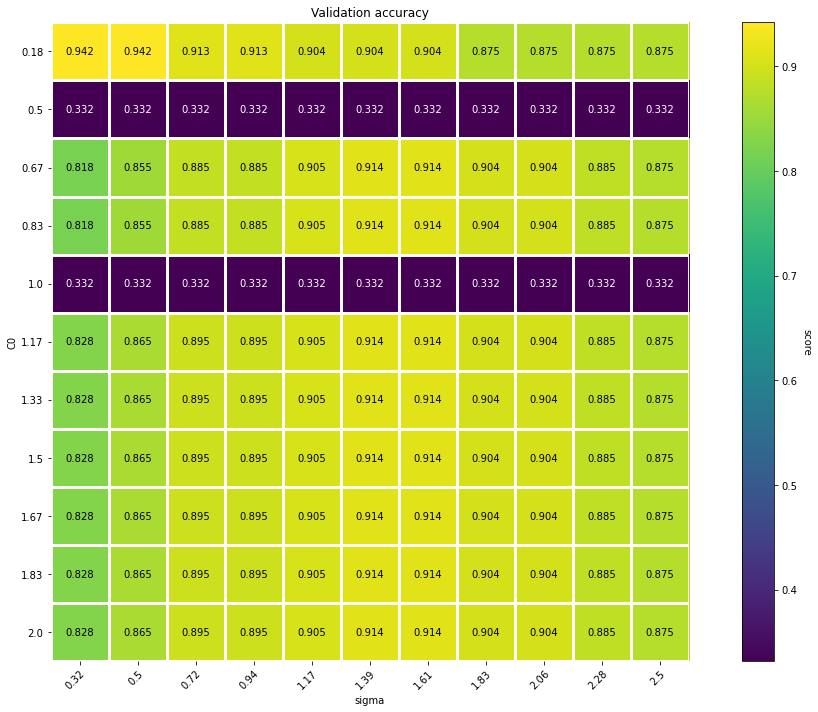

In [18]:
new_gs = score_zoom(gs_res, fixed=['C1'], param_grid=param_grid, log=log)

## Iris-virginica non-conservative metric score charts with fixed C0

In [19]:
logging.info('*** Iris-virginica non-conservative metric score charts with fixed C0 ***')

In [20]:
C1_range = np.linspace(0.1, 0.7, 10)
sigma_range = np.linspace(0.5, 2.5, 10)
param_grid = {'C1': C1_range, 'sigma': sigma_range}

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   14.9s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.7s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0xebc69682
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-01, 1e+00]
  Bounds range     [2e-01, 2e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 35 columns
Presolve time: 0.00s
Presolved: 1 rows, 35 columns, 35 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -6.9211166e-01   8.221721e-01   0.000000e+00      0s
       1   -7.8326368e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective -7.832636793e-01


[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   47.5s finished


mean_fit_time                                                     0.0712485
std_fit_time                                                     0.00243026
mean_score_time                                                  0.00370846
std_score_time                                                   0.00039022
param_estimator__C1                                                0.166667
param_estimator__sigma                                             0.316228
params                    {'estimator__C1': 0.16666666666666669, 'estima...
split0_test_score                                                  0.818182
split1_test_score                                                         1
split2_test_score                                                         1
split3_test_score                                                         1
split4_test_score                                                         1
split5_test_score                                                         1
split6_test_

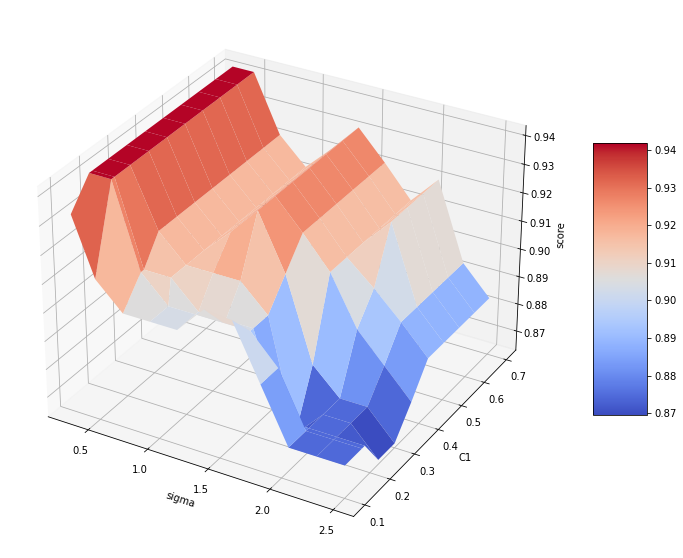

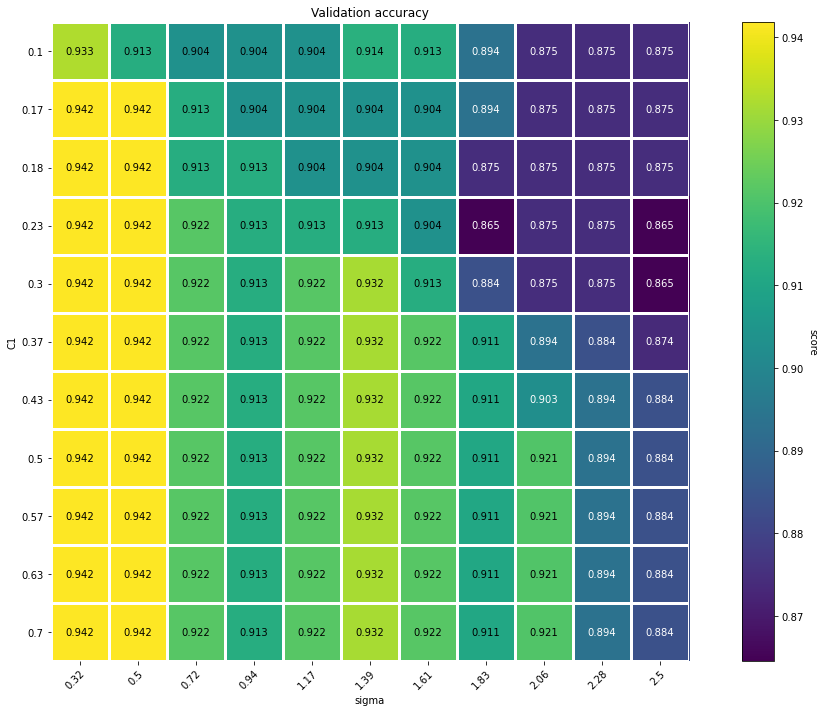

In [21]:
new_gs = score_zoom(gs_res, fixed=['C0'], param_grid=param_grid)

## Iris-versicolor conservative metric GridSearch

In [22]:
logging.info('*** Iris-versicolor conservative metric GridSearch ***')

In [23]:
dataset_loader = lambda: load_iris(d=2, target='Iris-versicolor')
contourf_colors = ['white', 'aquamarine', 'lightseagreen', 'red']

In [24]:
C0_range = np.concatenate((np.logspace(-1, 0, 5), []))
C1_range = np.concatenate((np.logspace(-1, 0, 5), [0.4]))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [1.36]))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [25]:
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid)

***** Split n. 0
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.3s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.8s
[Parallel(n_jobs=2)]: Done 1588 tasks      | elapsed:  1.0min


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0xfaf4d995
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-04, 9e-01]
  Bounds range     [1e-01, 1e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 70 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.2156052e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  8.215605170e-02
mean_fit_time                                                     0.0671662
std_fit_time                                                     0.00150631
mean_score_time                                                   0.0035135
std_score_time                                                  0.000478192
param_estimator

[Parallel(n_jobs=2)]: Done 1800 out of 1800 | elapsed:  1.2min finished
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


100%|##########| 104632/104632 [00:37<00:00, 2800.47it/s]
F:\Copia HD G\Universita\UNIMI\Th\PyCharm\shadowedSetLearn\src\utils.py:91: UserWarning: No contour levels were found within the data range.
  out2 = ax.contour(xx, yy, Z, levels=contour_levels, linewidths=1, linestyles='dashed', colors=line_colors)


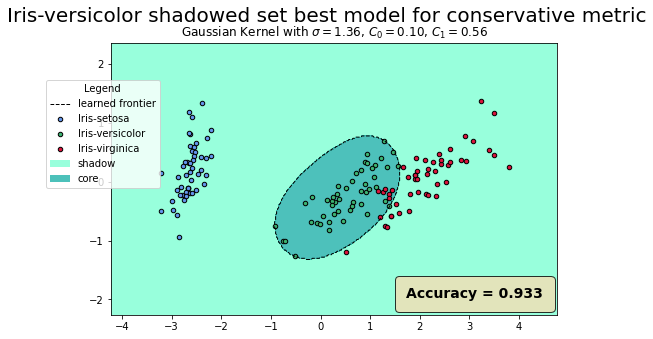

In [26]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Iris-versicolor conservative metric score charts with fixed C0

In [27]:
logging.info('*** Iris-versicolor conservative metric score charts with fixed C0 ***')

In [28]:
C1_range = np.linspace(0.2, 2, 10)
sigma_range = np.linspace(0.5, 2.5, 10)
param_grid = {'C1': C1_range, 'sigma': sigma_range}

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.0s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.4s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0x61e843d6
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-04, 9e-01]
  Bounds range     [1e-01, 1e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 70 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.2156050e-02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective  8.215605024e-02


[Parallel(n_jobs=2)]: Done 1207 out of 1210 | elapsed:   46.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   46.8s finished
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean_fit_time                                                     0.067886
std_fit_time                                                    0.00190377
mean_score_time                                                 0.00336895
std_score_time                                                 0.000557774
param_estimator__C1                                                    0.4
param_estimator__sigma                                                1.36
params                    {'estimator__C1': 0.4, 'estimator__sigma': 1.36}
split0_test_score                                                 0.909091
split1_test_score                                                 0.909091
split2_test_score                                                 0.909091
split3_test_score                                                 0.909091
split4_test_score                                                        1
split5_test_score                                                      0.9
split6_test_score        

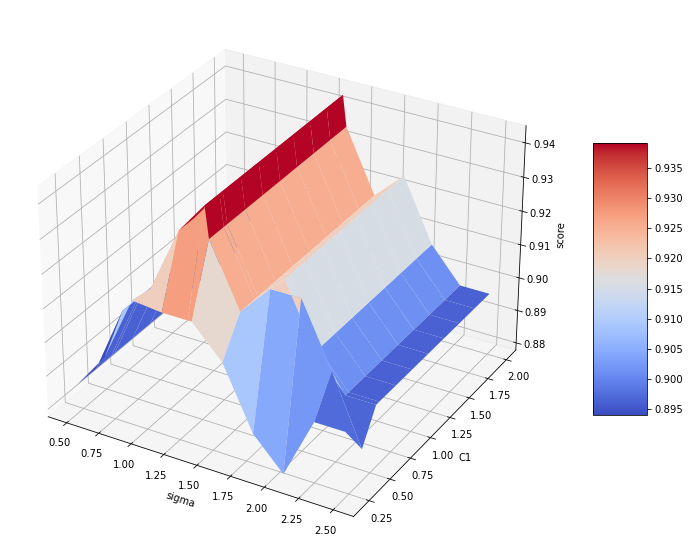

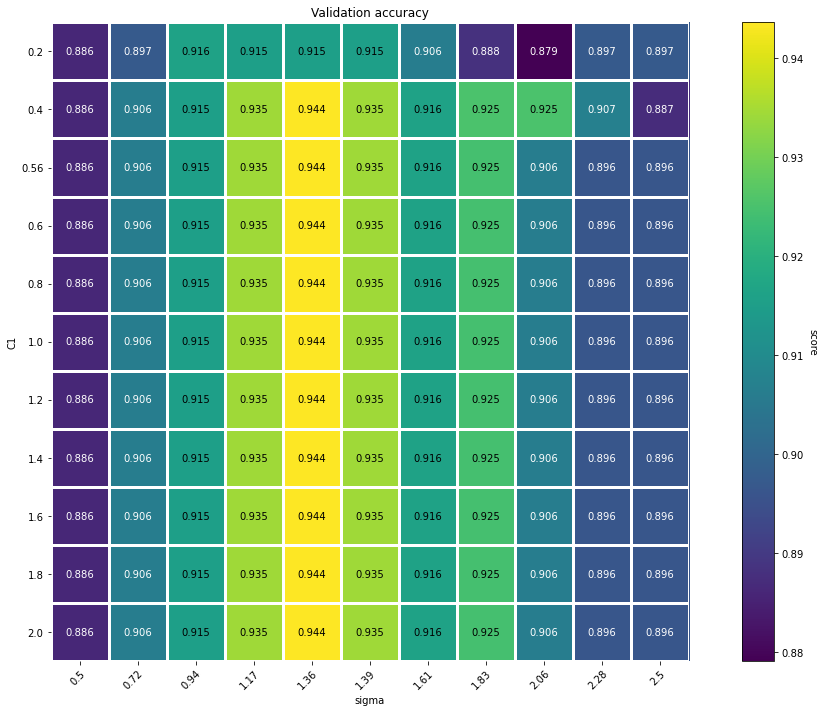

In [29]:
new_gs = score_zoom(gs_res, fixed=['C0'], param_grid=param_grid)

## Iris-versicolor conservative metric score charts with fixed C1

In [30]:
logging.info('*** Iris-versicolor conservative metric score charts with fixed C1 ***')

In [31]:
C0_range = np.linspace(0.05, 0.5, 10)
sigma_range = np.linspace(0.5, 2.5, 10)
param_grid = {'C0': C0_range, 'sigma': sigma_range}

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.0s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.4s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0x573c6f02
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-04, 9e-01]
  Bounds range     [5e-02, 5e-02]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s
Presolved: 1 rows, 67 columns, 67 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.7759762e-01   9.500000e-01   0.000000e+00      0s
       1   -2.6626155e-03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective -2.662615464e-03


[Parallel(n_jobs=2)]: Done 1207 out of 1210 | elapsed:   46.6s remaining:    0.0s
[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   46.7s finished
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean_fit_time                                                     0.0669572
std_fit_time                                                     0.00197317
mean_score_time                                                  0.00341597
std_score_time                                                  0.000488186
param_estimator__C0                                                    0.05
param_estimator__sigma                                                 1.36
params                    {'estimator__C0': 0.05, 'estimator__sigma': 1.36}
split0_test_score                                                  0.909091
split1_test_score                                                  0.909091
split2_test_score                                                  0.909091
split3_test_score                                                  0.909091
split4_test_score                                                         1
split5_test_score                                                       0.9
split6_test_

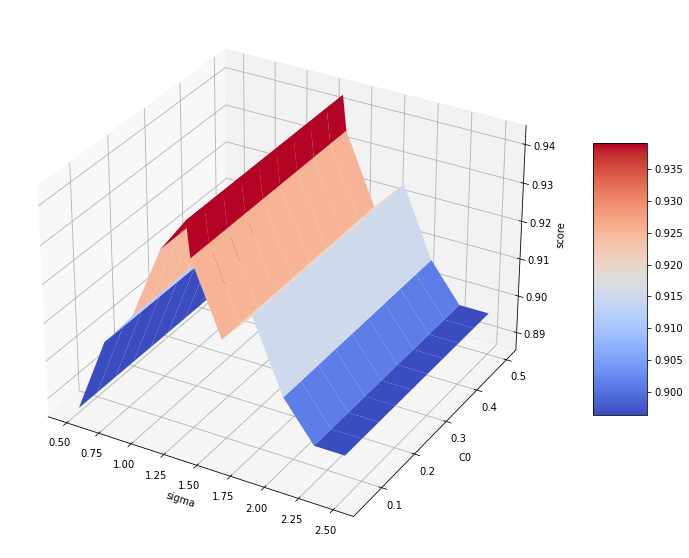

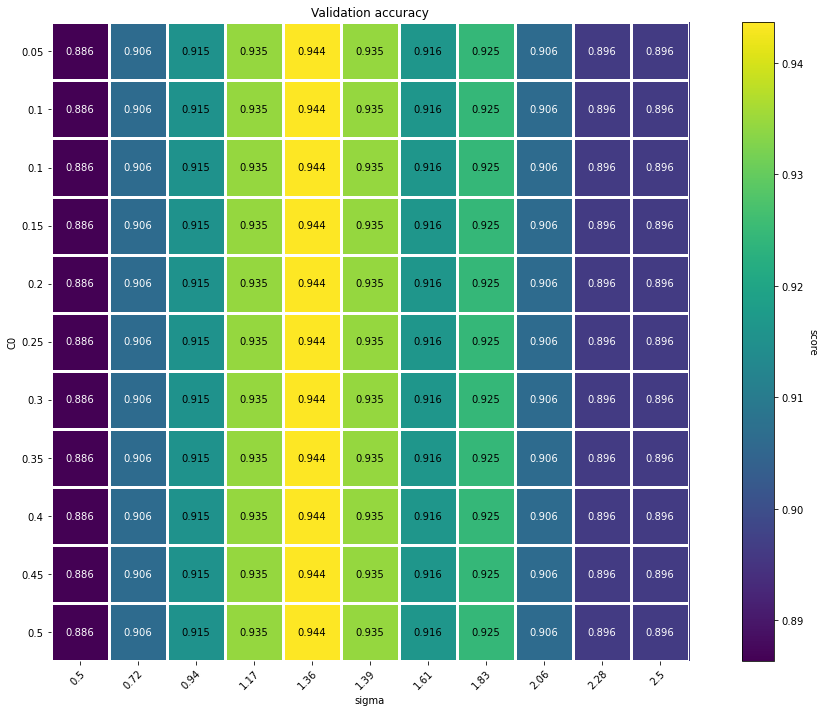

In [32]:
new_gs = score_zoom(gs_res, fixed=['C1'], param_grid=param_grid)

## Iris-versicolor non-conservative metric GridSearch

In [33]:
logging.info('*** Iris-versicolor non-conservative metric GridSearch ***')

In [34]:
C0_range = np.concatenate((np.logspace(-1, 0, 5), []))
C1_range = np.concatenate((np.logspace(-1, 0, 5), [0.468]))
sigma_range = np.concatenate((np.logspace(-1, 1, 5), [1.36]))
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [35]:
gs_res = grid_search(dataset_loader, estimator, 'non-conservative', param_grid)

***** Split n. 0
Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.2s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.8s
[Parallel(n_jobs=2)]: Done 1588 tasks      | elapsed:  1.0min


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0x816548e5
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 1e+00]
  Bounds range     [3e-01, 3e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s
Presolved: 1 rows, 67 columns, 67 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0338423e-01   6.837722e-01   0.000000e+00      0s
       1    5.9653317e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective  5.965331698e-02
mean_fit_time                                                     0.0706016
std_fit_time                                                     0.00520296
mean_score_time                                                  0.00361335
std_score_time         

[Parallel(n_jobs=2)]: Done 1800 out of 1800 | elapsed:  1.2min finished


100%|##########| 104632/104632 [00:36<00:00, 2834.12it/s]


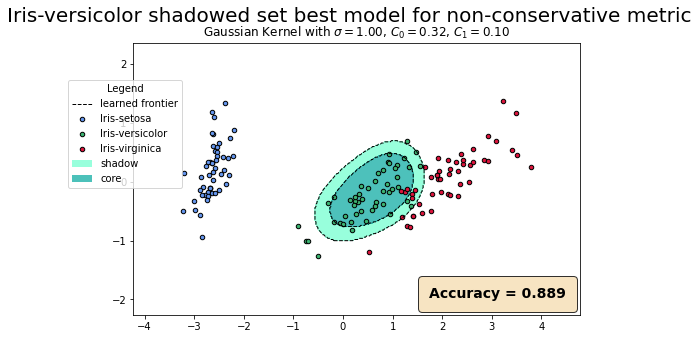

In [36]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Iris-versicolor non-conservative metric score charts with fixed C1

In [37]:
logging.info('*** Iris-versicolor non-conservative metric score charts with fixed C1 ***')

In [38]:
C0_range = np.linspace(0.5, 1, 10)
sigma_range = np.linspace(0.5, 2.5, 10)
param_grid = {'C0': C0_range, 'sigma': sigma_range}

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.0s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0xfeb4c16f
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 1e+00]
  Bounds range     [3e-01, 3e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s
Presolved: 1 rows, 67 columns, 67 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.5079916e-01   6.837722e-01   0.000000e+00      0s
       1   -1.9651805e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective -1.965180529e-01


[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   46.2s finished


mean_fit_time                                                     0.0673973
std_fit_time                                                     0.00142349
mean_score_time                                                  0.00351901
std_score_time                                                  0.000650407
param_estimator__C0                                                0.316228
param_estimator__sigma                                             0.722222
params                    {'estimator__C0': 0.31622776601683794, 'estima...
split0_test_score                                                  0.909091
split1_test_score                                                  0.818182
split2_test_score                                                  0.909091
split3_test_score                                                  0.909091
split4_test_score                                                         1
split5_test_score                                                       0.9
split6_test_

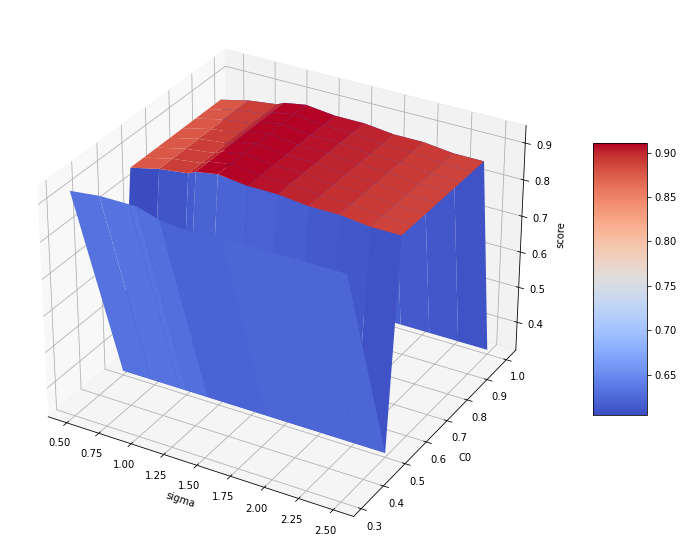

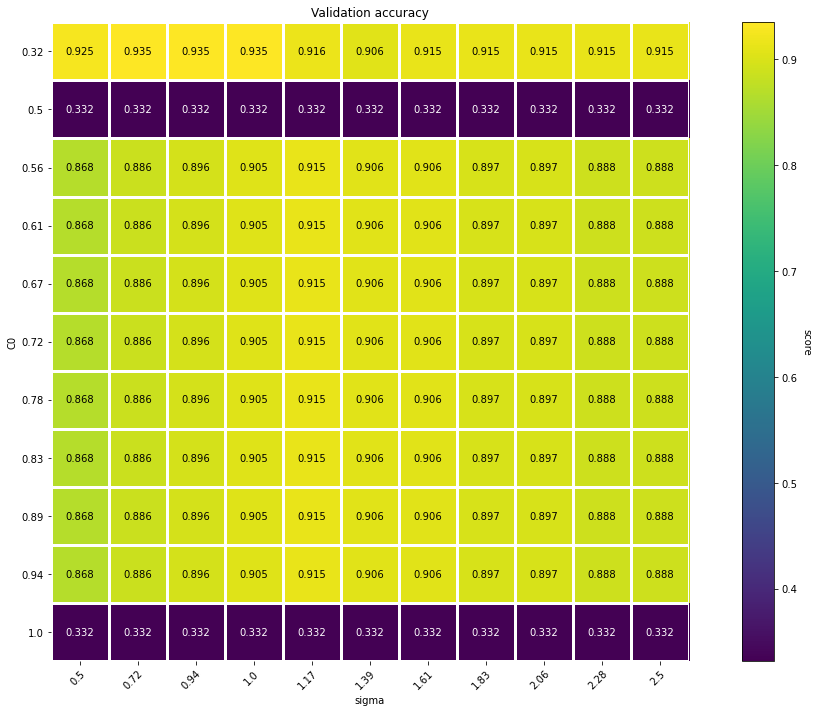

In [39]:
new_gs = score_zoom(gs_res, fixed=['C1'], param_grid=param_grid)

## Iris-versicolor non-conservative metric score charts with fixed C0

In [40]:
logging.info('*** Iris-versicolor non-conservative metric score charts with fixed C0 ***')

In [41]:
C1_range = np.linspace(0.2, 1.5, 10)
sigma_range = np.linspace(0.5, 2.5, 10)
param_grid = {'C1': C1_range, 'sigma': sigma_range}

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   14.9s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.2s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0x5fff7c08
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-03, 7e-01]
  Bounds range     [3e-01, 3e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 3 columns
Presolve time: 0.00s
Presolved: 1 rows, 67 columns, 67 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0363301e-01   6.837722e-01   0.000000e+00      0s
       1    2.7277533e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective  2.727753326e-01


[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   46.5s finished


mean_fit_time                                                     0.0685265
std_fit_time                                                     0.00117031
mean_score_time                                                  0.00367029
std_score_time                                                  0.000585391
param_estimator__C1                                                0.488889
param_estimator__sigma                                              1.61111
params                    {'estimator__C1': 0.48888888888888893, 'estima...
split0_test_score                                                  0.909091
split1_test_score                                                  0.909091
split2_test_score                                                  0.909091
split3_test_score                                                  0.909091
split4_test_score                                                         1
split5_test_score                                                       0.9
split6_test_

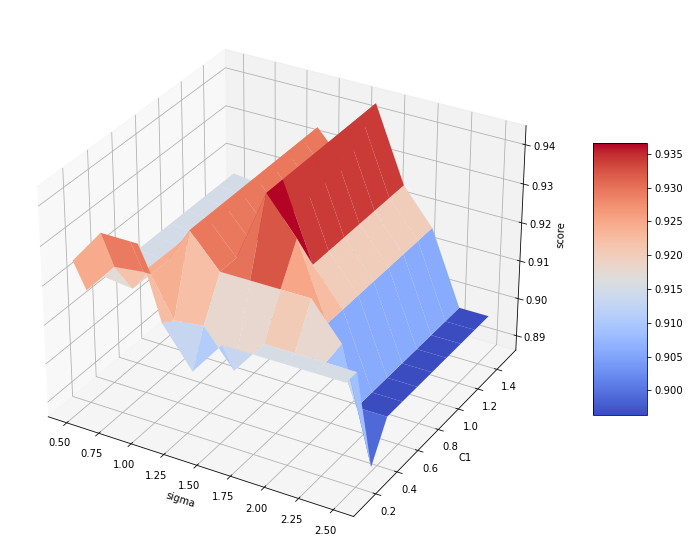

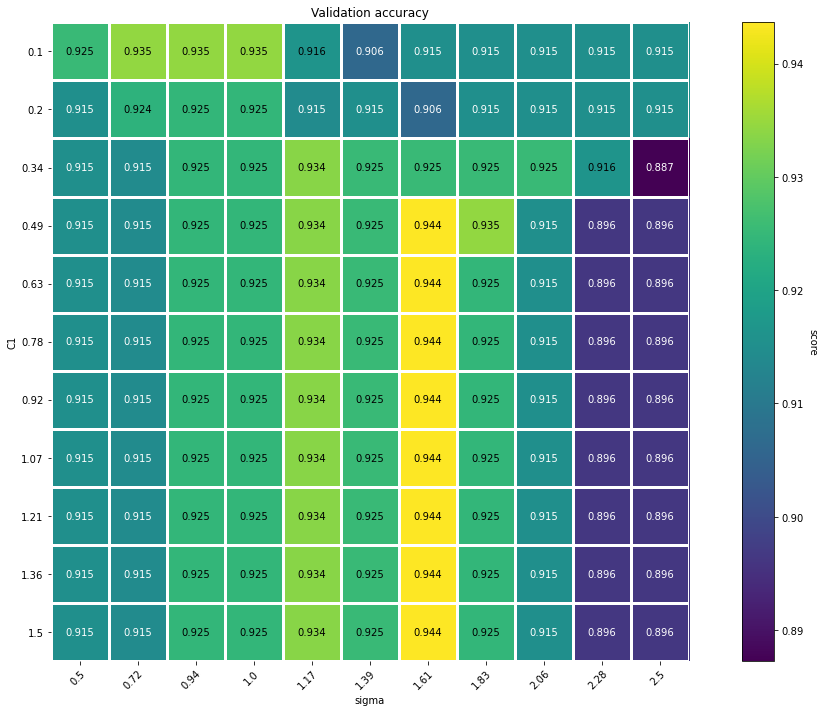

In [42]:
new_gs = score_zoom(gs_res, fixed=['C0'], param_grid=param_grid)

## Iris-setosa conservative metric GridSearch

In [43]:
logging.info('*** Iris-setosa conservative metric GridSearch ***')

In [44]:
dataset_loader = lambda: load_iris(d=2, target='Iris-setosa')
contourf_colors = ['white', 'lightskyblue', 'steelblue', 'red']

In [45]:
C0_range = [0.1, 0.3, 0.7, 1, 5]
C1_range = [0.1, 0.3, 0.5, 0.7, 1]
sigma_range = [.1, .5, 1, 1.32, 1.5, 2]
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [46]:
gs_res = grid_search(dataset_loader, estimator, 'conservative', param_grid)

***** Split n. 0
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.0s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.5s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0x1c660e25
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-01, 1e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 1 rows, 69 columns, 69 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.1327798e-01   9.000000e-01   0.000000e+00      0s
       1   -7.8431157e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds
Optimal objective -7.843115702e-01
mean_fit_time                                                      0.066012
std_fit_time                                                     0.00172123
mean_score_time                                                  0.00351903
std_score_time         

[Parallel(n_jobs=2)]: Done 1500 out of 1500 | elapsed:   57.8s finished
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


100%|##########| 104632/104632 [00:36<00:00, 2853.75it/s]
F:\Copia HD G\Universita\UNIMI\Th\PyCharm\shadowedSetLearn\src\utils.py:91: UserWarning: No contour levels were found within the data range.
  out2 = ax.contour(xx, yy, Z, levels=contour_levels, linewidths=1, linestyles='dashed', colors=line_colors)


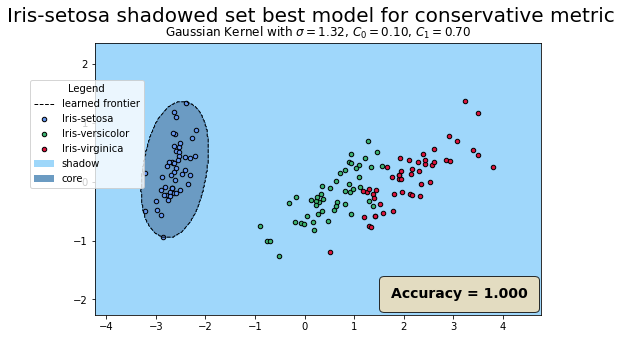

In [47]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Iris-setosa conservative metric score charts

In [48]:
logging.info('*** Iris-setosa conservative metric score charts ***')

In [49]:
C1_range = np.linspace(0.1, 2, 10)
sigma_range = np.linspace(0.1, 2, 10)
param_grid = {'C1': C1_range, 'sigma': sigma_range}

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.2s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.9s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0xa1e6b60b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-01, 1e+00]
  Bounds range     [1e-01, 1e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 1 rows, 69 columns, 69 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -5.1327797e-01   9.000000e-01   0.000000e+00      0s
       1   -7.8431157e-01   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.01 seconds
Optimal objective -7.843115696e-01


[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   47.4s finished
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Users\gabri\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


mean_fit_time                                                     0.0681253
std_fit_time                                                     0.00168122
mean_score_time                                                  0.00390601
std_score_time                                                  0.000441775
param_estimator__C1                                                0.522222
param_estimator__sigma                                                 1.32
params                    {'estimator__C1': 0.5222222222222223, 'estimat...
split0_test_score                                                         1
split1_test_score                                                         1
split2_test_score                                                  0.818182
split3_test_score                                                         1
split4_test_score                                                         1
split5_test_score                                                         1
split6_test_

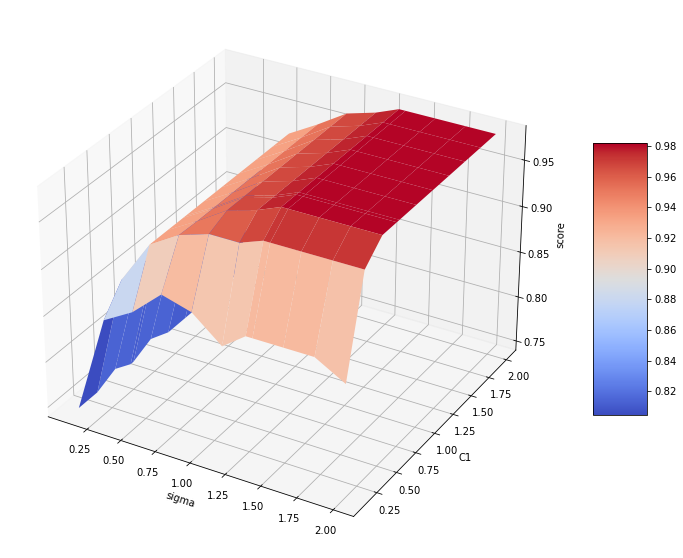

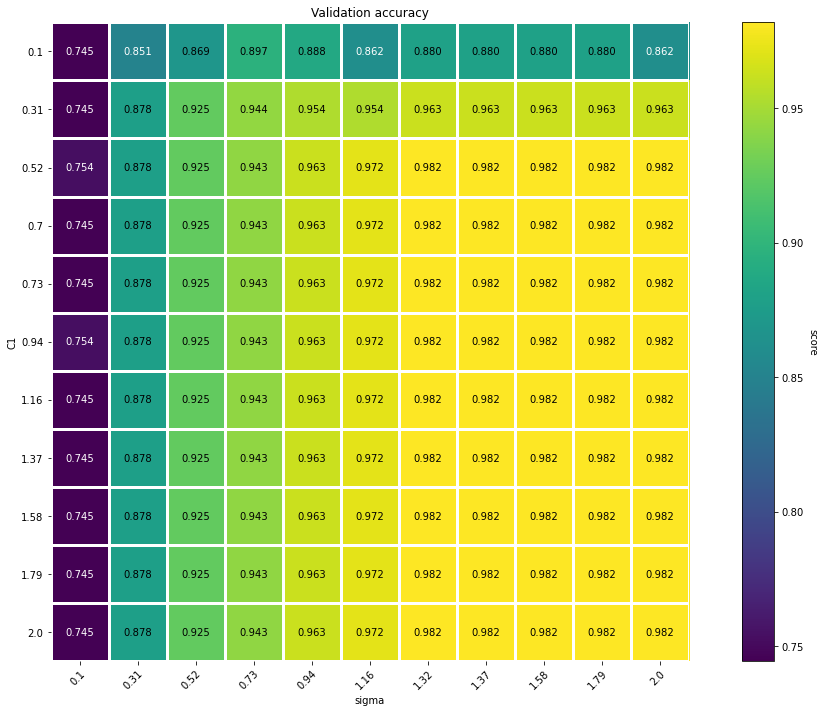

In [50]:
new_gs = score_zoom(gs_res, fixed=['C0'], param_grid=param_grid)

## Iris-setosa non-conservative metric GridSearch

In [51]:
logging.info('*** Iris-setosa non-conservative metric GridSearch ***')

In [52]:
C0_range = [0.1, 0.3, 0.7, 1, 5]
C1_range = [0.1, 0.3, 0.7, 1]
sigma_range = [ .1, .3, .5, 1, 1.5, 2]
param_grid = {'C0': C0_range, 'C1': C1_range, 'sigma': sigma_range}

In [53]:
gs_res = grid_search(dataset_loader, estimator, 'non-conservative', param_grid)

***** Split n. 0
Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.0s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   34.5s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0xe4115882
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [3e-01, 3e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 70 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective -1.000000000e+00
mean_fit_time                                                     0.0738964
std_fit_time                                                      0.0019946
mean_score_time                                                  0.00359871
std_score_time                                                  0.000436915
param_estimator

[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed:   46.7s finished


100%|##########| 104632/104632 [00:37<00:00, 2793.51it/s]


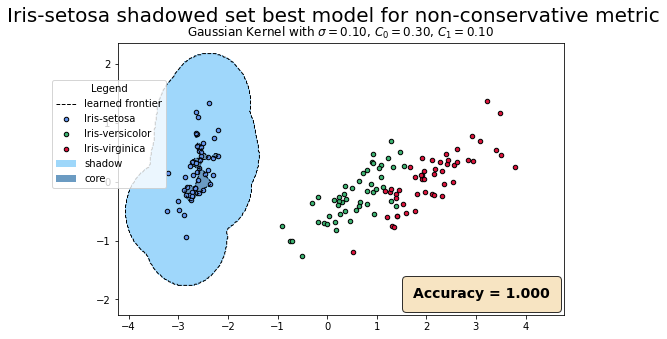

In [54]:
plot_shadowed_set(gs_res, labels, label_colors, contourf_colors)

## Iris-setosa non-conservative metric score charts

In [55]:
logging.info('*** Iris-setosa non-conservative metric score charts ***')

In [56]:
C0_range = np.linspace(0.1, 2, 10)
sigma_range = np.linspace(0.1, 2, 10)
param_grid = {'C0': C0_range, 'sigma': sigma_range}

Fitting 10 folds for each of 121 candidates, totalling 1210 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  88 tasks      | elapsed:    3.4s
[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:   15.4s
[Parallel(n_jobs=2)]: Done 888 tasks      | elapsed:   35.4s


Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1 rows, 70 columns and 70 nonzeros
Model fingerprint: 0xe4115882
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [3e-01, 3e-01]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 70 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -1.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds
Optimal objective -1.000000000e+00


[Parallel(n_jobs=2)]: Done 1210 out of 1210 | elapsed:   48.0s finished


mean_fit_time                                                   0.0787096
std_fit_time                                                   0.00805956
mean_score_time                                                0.00383575
std_score_time                                                0.000528617
param_estimator__C0                                                   0.3
param_estimator__sigma                                                0.1
params                    {'estimator__C0': 0.3, 'estimator__sigma': 0.1}
split0_test_score                                                       1
split1_test_score                                                       1
split2_test_score                                                       1
split3_test_score                                                       1
split4_test_score                                                       1
split5_test_score                                                       1
split6_test_score                     

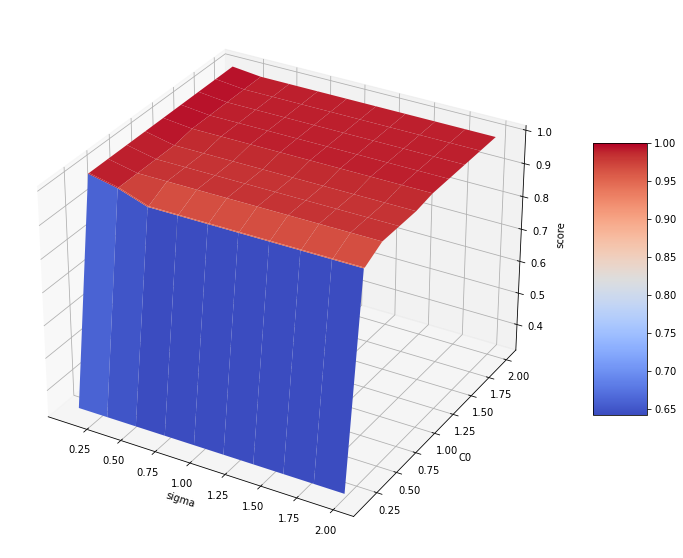

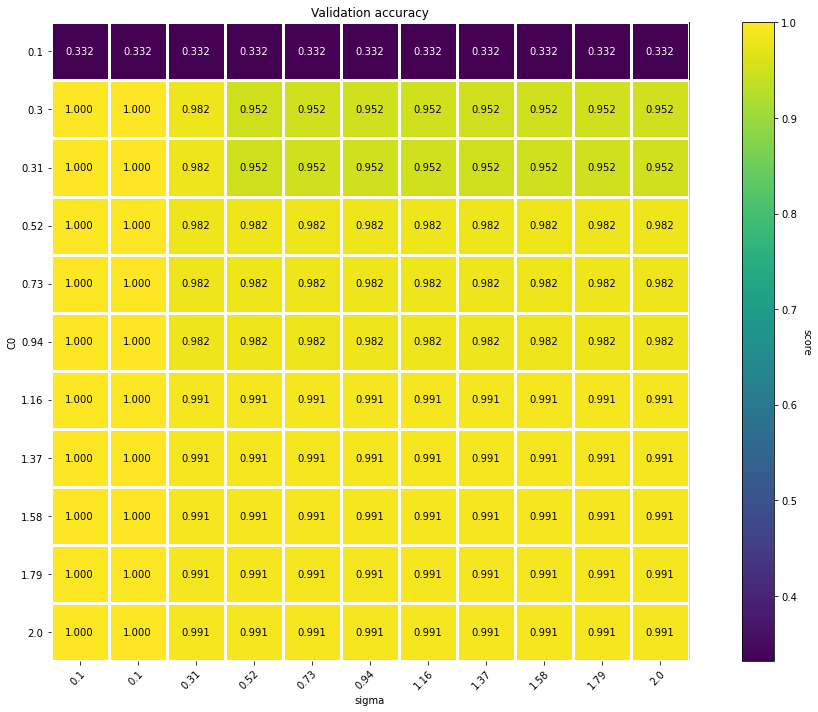

In [57]:
new_gs = score_zoom(gs_res, fixed=['C1'], param_grid=param_grid)

In [58]:
log_last_execution('Finished Grid Search for Gurobi Two Phases Dual Models on Iris dataset', log=log)

TypeError: log_last_execution() missing 1 required positional argument: 'closing_log'